In [2]:
! pip install openpyxl

In [24]:
import pandas as pd
import datetime
from census import Census
import matplotlib.pyplot as plt

In [38]:
# importing spreadsheet with monthly ridership data (https://www.transit.dot.gov/ntd/data-product/monthly-module-adjusted-data-release)
# description of data (https://www.transit.dot.gov/sites/fta.dot.gov/files/2024-08/2024-NTD-Monthly-Ridership-Weekly%20Reference-Manual.pdf)
ntd_monthly = pd.read_excel('ridership_data.xlsx', sheet_name='UPT')
ntd_monthly.head(5)
#drop NTD ID, legacy NTD ID, inactive service statuses, 

,NTD ID,Legacy NTD ID,Agency,Mode/Type of Service Status,Reporter Type,UACE CD,UZA Name,Mode,TOS,3 Mode,...,5/2024,6/2024,7/2024,8/2024,9/2024,10/2024,11/2024,12/2024,1/2025,2/2025
0,1.0,0001,King County,Active,Full Reporter,80389.0,"Seattle--Tacoma, WA",DR,PT,Bus,...,90826.0,82332.0,86007.0,90416.0,86251.0,94960.0,80691.0,87395.0,96298.0,83450.0
1,1.0,0001,King County,Active,Full Reporter,80389.0,"Seattle--Tacoma, WA",DR,TX,Bus,...,9951.0,8324.0,8535.0,9690.0,10668.0,11728.0,8482.0,7868.0,6315.0,6764.0
2,1.0,0001,King County,Active,Full Reporter,80389.0,"Seattle--Tacoma, WA",FB,DO,Ferry,...,38338.0,46948.0,67951.0,62910.0,46702.0,37503.0,25759.0,24240.0,26935.0,22362.0
3,1.0,0001,King County,Inactive,Full Reporter,80389.0,"Seattle--Tacoma, WA",LR,DO,Rail,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,0001,King County,Active,Full Reporter,80389.0,"Seattle--Tacoma, WA",MB,DO,Bus,...,6401486.0,5933767.0,6137519.0,6019974.0,6139353.0,6820828.0,5983373.0,5655460.0,6158381.0,5748640.0


guide used to understand abbreviations and deciding which rows to drop: https://www.transit.dot.gov/ntd/national-transit-database-ntd-glossary

Given size of dataset, only using public transportation considered directly operated by a transit agency, is currently operating (as of 2023) and is a full reporter which are required to "report monthly ridership data for each mode of public transportation
service that the agency operates". 

For modes of transportation, I dropped rows that contained vanpool and demand response, which don't operate on fixed routes or schedules. 

Rail modes:   
Alaska Railroad (AR), Cable car (CC), Commuter rail (CR), Heavy rail (HR), Hybrid rail (YR), Inclined plane (IP),Light rail (LR),
Monorail/Automated guideway transit (MG), Streetcar (SR)
Non-rail modes:
Bus (MB), Bus rapid transit (RB), Commuter bus (CB), Ferryboat (FB), Trolleybus (TB)

In [19]:
ntd_annual = pd.read_excel('ridership_data.xlsx', sheet_name='Master')
ntd_annual = ntd_annual[ntd_annual['Mode/Type of Service Status'] == 'Active']
ntd_annual = ntd_annual[ntd_annual['TOS'] == 'DO']
ntd_annual = ntd_annual[ntd_annual['Reporter Type'] == 'Full Reporter']
ntd_annual = ntd_annual[ntd_annual['Mode'] != 'DR']
ntd_annual = ntd_annual[ntd_annual['Mode'] != 'VP']

In [20]:
ntd_annual['Mode'].value_counts()

Mode
MB    288
CB     34
LR     21
RB     17
FB     16
SR     16
HR     14
CR     10
MG      5
TB      4
IP      3
YR      2
AR      1
CC      1
Name: count, dtype: int64

In [23]:
ntd_annual.head(10)

,NTD ID,Legacy NTD ID,Agency,Mode,TOS,3 Mode,Mode/Type of Service Status,Reporter Type,Organization Type,HQ City,...,Last Closed Report Year,Last Closed FY End Month,Last Closed FY End Year,Passenger Miles FY,Unlinked Passenger Trips FY,Avg Trip Length FY,Fares FY,Operating Expenses FY,Avg Cost Per Trip FY,Avg Fares Per Trip FY
2,1,0001,King County,FB,DO,Ferry,Active,Full Reporter,"City, County or Local Government Unit or Depar...",SEATTLE,...,2023.0,12.0,2023.0,1479694.0,399687.0,3.702132,1493280.0,8625721.0,21.581190,3.736124
4,1,0001,King County,MB,DO,Bus,Active,Full Reporter,"City, County or Local Government Unit or Depar...",SEATTLE,...,2023.0,12.0,2023.0,244710079.0,63485248.0,3.854598,60386305.0,710359423.0,11.189362,0.951186
6,1,0001,King County,SR,DO,Rail,Active,Full Reporter,"City, County or Local Government Unit or Depar...",SEATTLE,...,2023.0,12.0,2023.0,1556379.0,1411817.0,1.102394,617795.0,13964269.0,9.890991,0.437589
7,1,0001,King County,TB,DO,Bus,Active,Full Reporter,"City, County or Local Government Unit or Depar...",SEATTLE,...,2023.0,12.0,2023.0,20078748.0,10851566.0,1.850309,10323654.0,92304429.0,8.506093,0.951352
11,2,0002,Spokane Transit Authority,MB,DO,Bus,Active,Full Reporter,Independent Public Agency or Authority of Tran...,SPOKANE,...,2023.0,12.0,2023.0,40386159.0,8947157.0,4.513854,5764300.0,86749358.0,9.695746,0.644261
15,3,0003,Pierce County Transportation Benefit Area Auth...,MB,DO,Bus,Active,Full Reporter,Independent Public Agency or Authority of Tran...,LAKEWOOD,...,2023.0,12.0,2023.0,26326548.0,6101806.0,4.314550,4290475.0,76259695.0,12.497889,0.703148
18,5,0005,City of Everett,MB,DO,Bus,Active,Full Reporter,"City, County or Local Government Unit or Depar...",EVERETT,...,2023.0,12.0,2023.0,4803479.0,1329885.0,3.611951,969209.0,20785261.0,15.629367,0.728792
21,6,0006,City of Yakima,MB,DO,Bus,Active,Full Reporter,"City, County or Local Government Unit or Depar...",YAKIMA,...,2023.0,12.0,2023.0,2415244.0,574582.0,4.203480,295091.0,7625824.0,13.271951,0.513575
25,7,0007,Lane Transit District,MB,DO,Bus,Active,Full Reporter,Independent Public Agency or Authority of Tran...,EUGENE,...,2023.0,6.0,2023.0,12630111.0,3405660.0,3.708565,2462769.0,39182127.0,11.505003,0.723140
27,7,0007,Lane Transit District,RB,DO,Bus,Active,Full Reporter,Independent Public Agency or Authority of Tran...,EUGENE,...,2023.0,6.0,2023.0,6304956.0,2554326.0,2.468344,1941487.0,14245853.0,5.577148,0.760078


In [7]:
nyc_daily = pd.read_csv('mta_daily_2020-2025.csv')
nyc_daily['Date'] = pd.to_datetime(nyc_daily['Date'], format='%m/%d/%Y')
nyc_daily = nyc_daily.sort_values(by='Date', ascending=False)
nyc_daily.head(5)

,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: Total Estimated Ridership,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day,Staten Island Railway: Total Estimated Ridership,Staten Island Railway: % of Comparable Pre-Pandemic Day
1775,2025-01-09,3734383,0.73,787710,0.38,229804,0.76,198894,0.74,38431,1.36,869256,1.00,6841,0.42
1774,2025-01-08,3830616,0.74,1256260,0.61,239444,0.79,209550,0.78,39406,1.39,852748,0.98,7798,0.48
1773,2025-01-07,3781536,0.74,1275936,0.62,245930,0.81,220945,0.82,38048,1.34,842968,0.97,7409,0.45
1772,2025-01-06,3436491,0.67,1238969,0.61,229503,0.76,202575,0.75,35840,1.27,792617,0.91,6887,0.42
1771,2025-01-05,1791020,0.86,618750,0.67,96683,1.17,79761,0.88,23665,1.75,726411,1.06,2039,0.74


In [37]:
dc_daily = pd.read_csv('dc_daily_2019-2025.csv', encoding="utf-16", delimiter= '\t')
dc_daily['Date'] = pd.to_datetime(dc_daily['Date'], format='%B %d, %Y')
# after attempting to plot data, realized the numeric values were strings and received error that it couldn't parse when using to_numeric
# so replaced strings first
dc_daily['Bus'] = dc_daily['Bus'].str.replace(',', '').astype(float)
dc_daily['Bus'] = pd.to_numeric(dc_daily['Bus'])
dc_daily['Rail'] = dc_daily['Rail'].str.replace(',', '').astype(float)
dc_daily['Rail'] = pd.to_numeric(dc_daily['Rail'])
dc_daily['Grand Total'] = dc_daily['Grand Total'].str.replace(',', '').astype(float)
dc_daily['Grand Total'] = pd.to_numeric(dc_daily['Grand Total'])
dc_daily.head(10)

,Date,Day of Week,Weekday / Saturday / Sunday,Holiday,Bus,Rail,Grand Total
0,2025-04-23,Wed,Weekday,No,430025.0,582598.0,1012623.0
1,2025-04-22,Tue,Weekday,No,431993.0,564737.0,996730.0
2,2025-04-21,Mon,Weekday,No,377701.0,466770.0,844471.0
3,2025-04-20,Sun,Sunday,No,214098.0,202209.0,416307.0
4,2025-04-19,Sat,Saturday,No,266270.0,307791.0,574061.0
5,2025-04-18,Fri,Weekday,No,354703.0,452330.0,807033.0
6,2025-04-17,Thu,Weekday,No,369433.0,514816.0,884249.0
7,2025-04-16,Wed,Weekday,No,358271.0,503234.0,861505.0
8,2025-04-15,Tue,Weekday,No,365293.0,515383.0,880676.0
9,2025-04-14,Mon,Weekday,No,359396.0,460021.0,819417.0


In [6]:
chicago_daily = pd.read_csv('chicago_ridership_2001-2025.csv')
chicago_daily['service_date'] = pd.to_datetime(chicago_daily['service_date'], format='%m/%d/%Y')
chicago_daily = chicago_daily.sort_values(by='service_date', ascending=False)
chicago_daily.head(5)

,service_date,day_type,bus,rail_boardings,total_rides
4900,2024-12-31,W,386206,281447,667653
4469,2024-12-30,W,447644,285475,733119
1859,2024-12-29,U,231003,158657,389660
23,2024-12-28,A,348599,222891,571490
3175,2024-12-27,W,394689,245475,640164


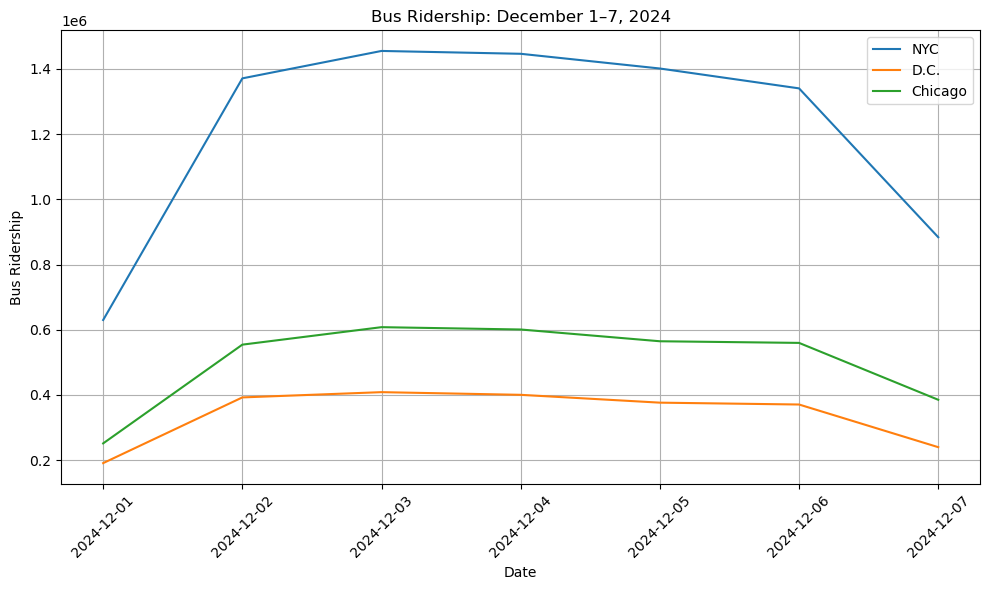

In [38]:
# test plot

# dates
start_date = '2024-12-01'
end_date = '2024-12-07'

# filtering for dates in NYC, D.C., and Chicago datasets
nyc_dec = nyc_daily[(nyc_daily['Date'] >= start_date) & (nyc_daily['Date'] <= end_date)]
dc_dec = dc_daily[(dc_daily['Date'] >= start_date) & (dc_daily['Date'] <= end_date)]
chicago_dec = chicago_daily[(chicago_daily['service_date'] >= start_date) & (chicago_daily['service_date'] <= end_date)]

# Plotting
plt.figure(figsize=(10, 6))

# Plotting bus ridership for each dataset
plt.plot(nyc_dec['Date'], nyc_dec['Buses: Total Estimated Ridership'], label='NYC')
plt.plot(dc_dec['Date'], dc_dec['Bus'], label='D.C.')
plt.plot(chicago_dec['service_date'], chicago_dec['bus'], label='Chicago')

plt.title('Bus Ridership: December 1–7, 2024')
plt.xlabel('Date')
plt.ylabel('Bus Ridership')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()